# Monty Hall problem

In [ ]:
import numpy as np

trial = []
win_cons = 0
lose_cons = 0
win_swi = 0
lose_swi = 0
win_new = 0
lose_new = 0
trials = 10000
for i in range(trials):
    doors = np.zeros(3, dtype=int)      # array of length 3 with all zeros
    doors[np.random.randint(0, 3)] = 1  # assign the value 1 to a random position in the array
    trial.append(doors)                 # make a list of arrays with the various "draws"
    
for doors in trial:                     # check the number of wins without switching
    conservative_choice = np.random.choice(doors)
    if doors[conservative_choice] == 1:        # if the chosen door (first choice) is equal to the door with the car (1)
        win_cons += 1                      
    else:
        lose_cons += 1

    available_doors = [i for i in range(3) if doors[i] == 0]   # make a list of indices where there are goats (0)
    opened_door = np.random.choice(available_doors)            # open a door where there is a goat (choose the index that points to a 0)
    other_doors = [i for i in range(3) if i != opened_door and i != conservative_choice] # list of indices that are neither chosen nor opened by the host

    switcher = other_doors[0]                   # switch door by choosing the only available index
    if doors[switcher] == 1:      # if the chosen door (second choice) is equal to the door with the car (1)
        win_swi += 1                      
    else:
        lose_swi += 1

    newcomer = np.random.choice(doors)
    if doors[newcomer] == 1:  
        win_new += 1                      
    else:
        lose_new += 1

print(f"Conservative player: Win percentage: {(win_cons*100)/trials}%, Lose percentage: {(lose_cons*100)/trials}%")
print(f"Switcher player: Win percentage: {(win_swi*100)/trials}%, Lose percentage: {(lose_swi*100)/trials}%")
print(f"Newcomer player: Win percentage: {(win_new*100)/trials}%, Lose percentage: {(lose_new*100)/trials}%")

Conservative player: Win percentage: 34.22%, Lose percentage: 65.78%
Switcher player: Win percentage: 49.51%, Lose percentage: 50.49%
Newcomer player: Win percentage: 33.45%, Lose percentage: 66.55%


## Monty Hall for N doors and p hints

In [ ]:
import numpy as np

trial = []
win_cons = 0
lose_cons = 0
win_swi = 0
lose_swi = 0
win_new = 0
lose_new = 0
trials = 10000
num_doors = 100                # N doors
doors_to_open = 95             # p doors to open
for i in range(trials):
    doors = np.zeros(num_doors, dtype=int)      # array of length 3 with all zeros
    doors[np.random.randint(0, num_doors)] = 1  # assign the value 1 to a random position in the array
    trial.append(doors)                 # make a list of arrays with the various "draws"
    
for doors in trial:                     # check the number of wins without switching
    conservative_choice = np.random.choice(doors)
    if doors[conservative_choice] == 1:        # if the chosen door (first choice) is equal to the door with the car (1)
        win_cons += 1                      
    else:
        lose_cons += 1
    
    available_doors = [i for i in range(num_doors) if doors[i] == 0]   # make a list of indices where there are goats (0)
    opened_N_door = np.random.choice(available_doors, size=doors_to_open, replace=False)          # open N doors where there is a goat (choose the index that points to a 0)
    other_doors = [i for i in range(num_doors) if i not in opened_N_door and i != conservative_choice] # list of indices that are neither chosen nor opened by the host

    switcher = other_doors[0]                   # switch door by choosing the only available index
    if doors[switcher] == 1:      # if the chosen door (second choice) is equal to the door with the car (1)
        win_swi += 1                      
    else:
        lose_swi += 1

    newcomer = np.random.choice(doors)
    if doors[newcomer] == 1:  
        win_new += 1                      
    else:
        lose_new += 1

print(f"Conservative player: Win percentage: {(win_cons*100)/trials}%, Lose percentage: {(lose_cons*100)/trials}%")
print(f"Switcher player: Win percentage: {(win_swi*100)/trials}%, Lose percentage: {(lose_swi*100)/trials}%")
print(f"Newcomer player: Win percentage: {(win_new*100)/trials}%, Lose percentage: {(lose_new*100)/trials}%")

Conservative player: Win percentage: 0.93%, Lose percentage: 99.07%
Switcher player: Win percentage: 21.03%, Lose percentage: 78.97%
Newcomer player: Win percentage: 0.92%, Lose percentage: 99.08%


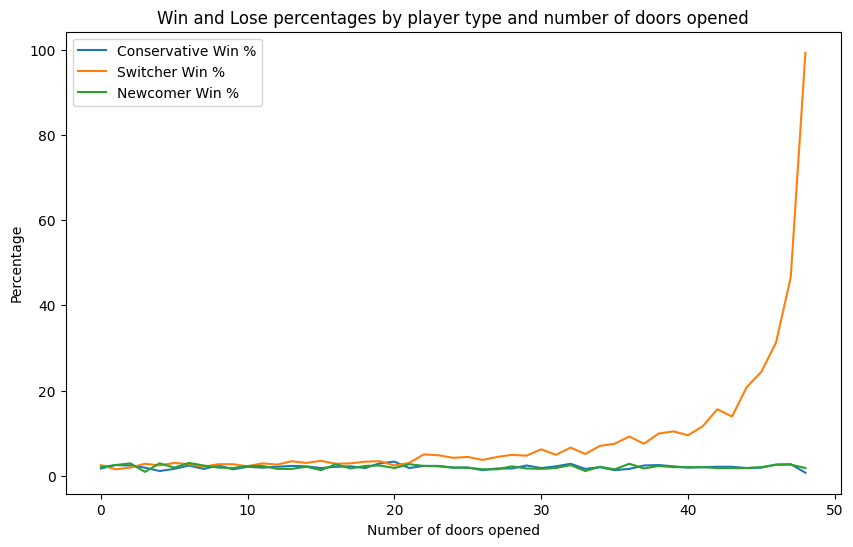

In [64]:
import numpy as np
import matplotlib.pyplot as plt

trials = 1000
num_doors = 50
results = []

for doors_to_open in range(num_doors-1):
    # Reset counters for each number of doors to open
    win_cons = 0
    lose_cons = 0
    win_swi = 0
    lose_swi = 0
    win_new = 0
    lose_new = 0
    trial = []  # Reset trial list
    
    # Generate new trials
    for i in range(trials):
        doors = np.zeros(num_doors, dtype=int)
        doors[np.random.randint(0, num_doors)] = 1
        trial.append(doors)
    
    # Run the game for each trial
    for doors in trial:
        conservative_choice = np.random.randint(0, num_doors)  # Use randint instead of choice
        if doors[conservative_choice] == 1:
            win_cons += 1
        else:
            lose_cons += 1
    
        available_doors = [i for i in range(num_doors) if doors[i] == 0 and i != conservative_choice]
        opened_N_door = np.random.choice(available_doors, size=doors_to_open, replace=False)
        other_doors = [i for i in range(num_doors) if i not in opened_N_door and i != conservative_choice]

        if len(other_doors) > 0:  # Make sure there are doors left to switch to
            switcher = other_doors[0]
            if doors[switcher] == 1:
                win_swi += 1
            else:
                lose_swi += 1

        newcomer = np.random.randint(0, num_doors)  # Use randint instead of choice
        if doors[newcomer] == 1:
            win_new += 1
        else:
            lose_new += 1
    
    # Add results only once per doors_to_open value
    results.append([
        [doors_to_open, (win_cons*100)/trials, (lose_cons*100)/trials],
        [doors_to_open, (win_swi*100)/trials, (lose_swi*100)/trials],
        [doors_to_open, (win_new*100)/trials, (lose_new*100)/trials]
    ])

# Convert results to a numpy array for easier manipulation
results_array = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for i, player_type in enumerate(['Conservative', 'Switcher', 'Newcomer']):
    ax.plot(results_array[:, i, 0], results_array[:, i, 1], label=f'{player_type} Win %')
ax.set_title('Win and Lose percentages by player type and number of doors opened')
ax.set_xlabel('Number of doors opened')
ax.set_ylabel('Percentage')
ax.legend()
plt.show()